In [11]:
import pandas as pd
# Load your dataset
data = pd.read_csv('C:/Users/Admin/Downloads/Quote-Equity-TATAMOTORS-EQ-13-09-2023-to-13-09-2024.csv')

In [13]:

# Strip any extra whitespace in column names
data.columns = data.columns.str.strip()

# Convert 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%Y')
data.set_index('Date', inplace=True)

# Convert 'close' column to numeric format, removing commas if necessary
data['close'] = data['close'].str.replace(',', '').astype(float)

# Display first few rows and summary info
print(data.head())
print(data.info())

           series      OPEN      HIGH       LOW PREV. CLOSE       ltp  \
Date                                                                    
2024-09-12     EQ    976.30    988.00    958.00      976.30    984.00   
2024-09-11     EQ  1,000.00  1,011.55    971.25    1,035.80    976.40   
2024-09-10     EQ  1,049.00  1,049.00  1,032.20    1,038.70  1,035.00   
2024-09-09     EQ  1,049.35  1,049.95  1,026.25    1,049.35  1,040.80   
2024-09-06     EQ  1,068.80  1,072.95  1,040.50    1,069.15  1,050.65   

              close      vwap     52W H  52W L       VOLUME  \
Date                                                          
2024-09-12   986.15    973.48  1,179.00  608.3  2,56,75,836   
2024-09-11   976.30    983.79  1,179.00  608.3  3,61,40,411   
2024-09-10  1035.80  1,038.72  1,179.00  608.3    69,19,238   
2024-09-09  1038.70  1,035.04  1,179.00  608.3    72,06,054   
2024-09-06  1049.35  1,051.98  1,179.00  605.6    87,17,377   

                         VALUE No of trades  


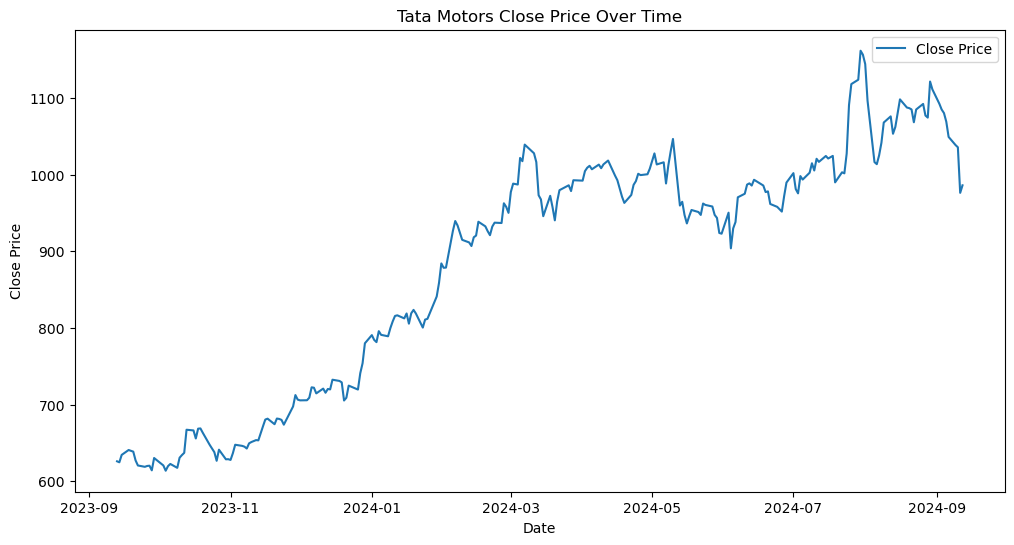

In [15]:
import matplotlib.pyplot as plt

# Plot close prices to visualize trends, seasonality, and outliers
plt.figure(figsize=(12, 6))
plt.plot(data['close'], label='Close Price')
plt.title('Tata Motors Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Missing values:
 series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
dtype: int64

Summary statistics:
 count     248.000000
mean      884.209274
std       157.274130
min       613.600000
25%       720.162500
50%       947.400000
75%      1002.737500
max      1161.850000
Name: close, dtype: float64


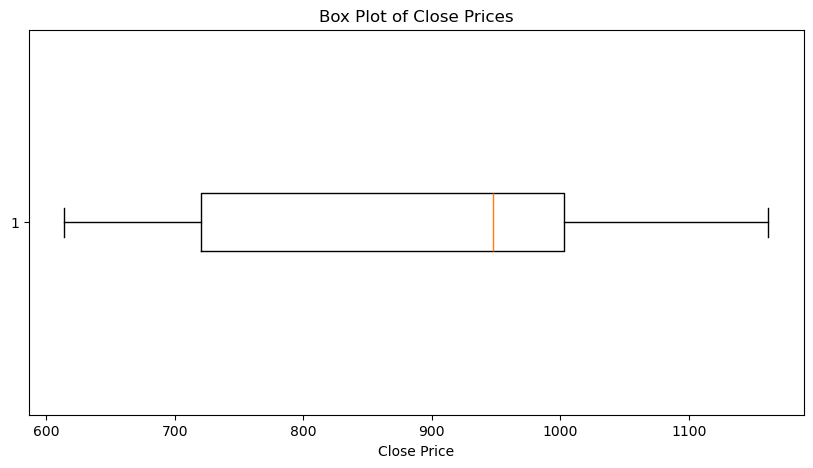

In [17]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Summary statistics to detect outliers
print("\nSummary statistics:\n", data['close'].describe())

# Box plot to visually detect outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data['close'].dropna(), vert=False)
plt.title('Box Plot of Close Prices')
plt.xlabel('Close Price')
plt.show()

In [19]:
# Calculate mean, standard deviation, and variance
mean_close = data['close'].mean()
std_close = data['close'].std()
var_close = data['close'].var()

print(f"Mean: {mean_close:.2f}")
print(f"Standard Deviation: {std_close:.2f}")
print(f"Variance: {var_close:.2f}")

Mean: 884.21
Standard Deviation: 157.27
Variance: 24735.15


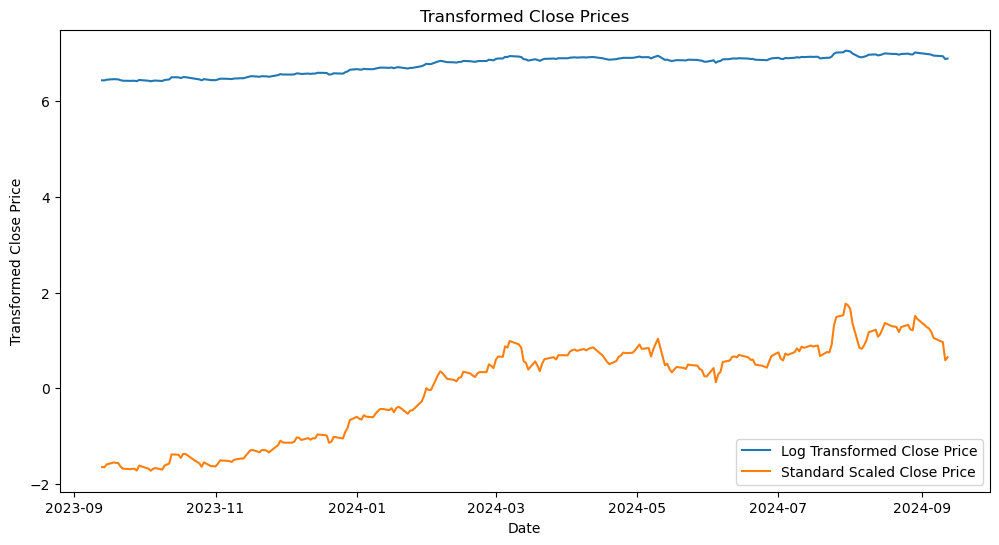

In [21]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Apply log transformation if data is highly skewed
data['log_close'] = np.log(data['close'])

# Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
data['scaled_close'] = scaler.fit_transform(data[['close']])

# Plot transformed data
plt.figure(figsize=(12, 6))
plt.plot(data['log_close'], label='Log Transformed Close Price')
plt.plot(data['scaled_close'], label='Standard Scaled Close Price')
plt.title('Transformed Close Prices')
plt.xlabel('Date')
plt.ylabel('Transformed Close Price')
plt.legend()
plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

<Figure size 1200x600 with 0 Axes>

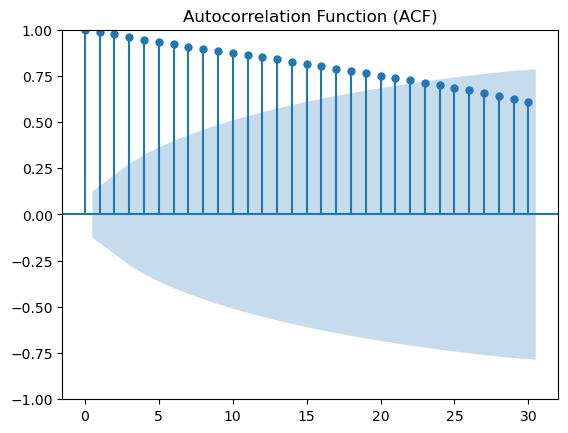

<Figure size 1200x600 with 0 Axes>

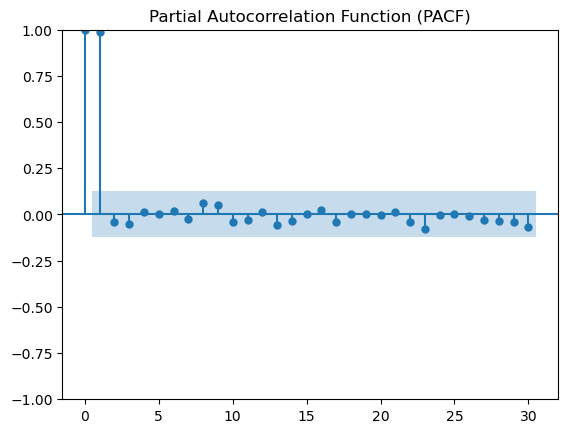

In [25]:
# Assuming the data is already cleaned and has 'Date' as the index and 'close' as the column of interest

# Plot ACF and PACF to identify AR and MA terms
plt.figure(figsize=(12, 6))
plot_acf(data['close'], lags=30, title='Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['close'], lags=30, title='Partial Autocorrelation Function (PACF)')
plt.show()

In [31]:
# Fit ARIMA model; update (p, d, q) based on your ACF and PACF observations
model = ARIMA(data['close'], order=(1, 1, 1))
model_fit = model.fit()

# Display model summary
print(model_fit.summary())

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  248
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1049.978
Date:                Sun, 24 Nov 2024   AIC                           2105.957
Time:                        13:21:08   BIC                           2116.485
Sample:                             0   HQIC                          2110.195
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3049      0.650      0.469      0.639      -0.970       1.580
ma.L1         -0.2222      0.663     -0.335      0.737      -1.522       1.077
sigma2       288.2782     13.622     21.162      0.0

In [33]:
# Make predictions on the training set
predictions = model_fit.predict(start=1, end=len(data)-1, typ='levels')

# Calculate Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(data['close'][1:], predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 288.29
Root Mean Squared Error (RMSE): 16.98


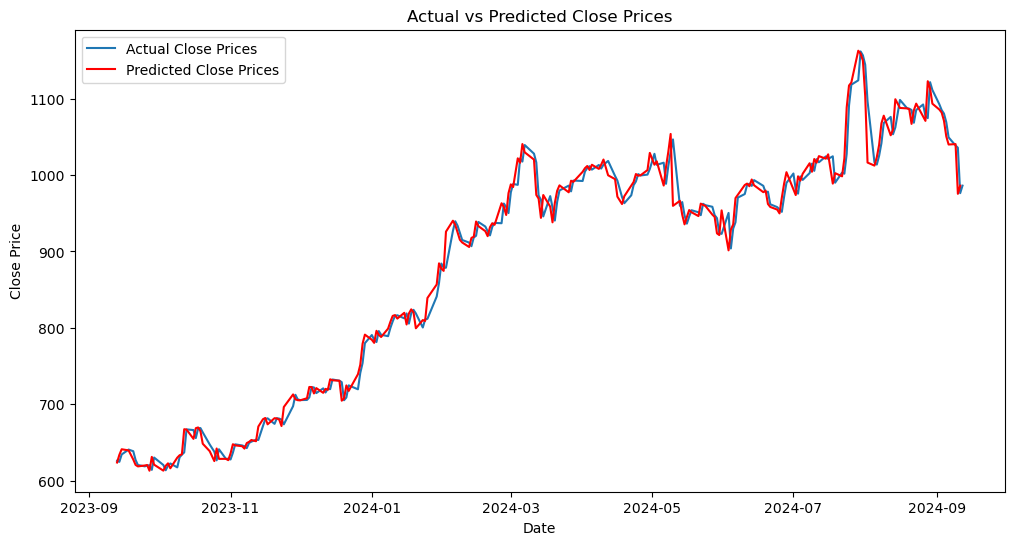

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(data['close'], label='Actual Close Prices')
plt.plot(predictions, color='red', label='Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()